# Detecting Problems and Streamlining Solutions- Customer Success Team

About Plum

Plum is an employee insurance and health benefits platform focused on making health insurance simple, accessible and inclusive for modern organizations.

Healthcare in India is seeing a phenomenal shift with inflation in healthcare costs 3x that of general inflation. A majority of Indians are unable to afford health insurance on their own; and so as many as 600mn Indians will likely have to depend on employer-sponsored insurance.

### Problem statement
The given dataset is an outcome of how the customer success team at Plum is performing on emails. 

Column C: Group indicates the different teams at Plum.

Share a view on:      

1. How are the efficiency numbers looking like?
2. Can you share your views? Which groups are quick, slow etc. Create a table + relevant charts.
3. What type of tickets are taking the most time to resolve? Create a table + relevant charts. Create the different type of data types we can infer from this data.



## Understanding the Data

In [2]:
# Importing Libraries
import pandas as pd

In [3]:
# Importing data
data = pd.read_csv("DAAssignment.csv")

# Data size
data.shape

(16476, 23)

In [4]:
# Data Preview
data.sample(10)

,Id,Requester id,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,...,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list]
7360,308426,6688413761309,Reimbursement Claims,Closed,Low,Mail,20-04-2023 16:29,19-05-2023 06:13,27-04-2023 11:16,27-04-2023 11:16,...,0,2,4726.0,0.0,0.0,0.0,0.0,0.0,0.0,-
11992,326959,10828237191581,Endorsements,Closed,Low,Mail,12-05-2023 19:23,15-06-2023 12:53,30-05-2023 16:01,30-05-2023 16:01,...,0,1,13161.0,48569.0,24089.0,48569.0,24089.0,26840.0,13160.0,-
13819,333998,10791248588445,Reimbursement Claims,Open,Low,Mail,21-05-2023 12:08,15-06-2023 17:43,22-05-2023 10:07,22-05-2023 10:07,...,0,6,1105.0,NaN,NaN,NaN,NaN,33545.0,16985.0,-
1449,309570,7223273175197,Support,Closed,Low,Internal Communication,21-04-2023 17:37,22-05-2023 06:00,21-04-2023 18:17,21-04-2023 18:17,...,1,3,44.0,203.0,203.0,2756.0,1316.0,2719.0,1316.0,-
13724,333386,6721632937629,Endorsements,New,Low,Mail,20-05-2023 07:00,20-05-2023 07:00,NaN,NaN,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-
12413,328427,7303317119773,Support,Closed,Low,Internal Communication,15-05-2023 13:39,07-06-2023 04:46,15-05-2023 14:18,15-05-2023 14:18,...,0,2,1.0,342.0,342.0,342.0,342.0,343.0,343.0,-
15379,339273,7302192205981,Support,Closed,Low,OutBound,26-05-2023 14:46,15-06-2023 16:37,26-05-2023 14:46,26-05-2023 14:46,...,0,1,61.0,61.0,61.0,61.0,61.0,61.0,61.0,-
2702,291137,7251420199965,Endorsements,Closed,Low,Mail,01-04-2023 07:00,08-06-2023 16:35,03-04-2023 15:13,03-04-2023 15:13,...,0,4,1814.0,69634.0,33874.0,69634.0,33874.0,3381.0,1821.0,-
8137,311648,7290760288029,Endorsements,Closed,Low,Mail,25-04-2023 07:00,07-06-2023 06:09,27-04-2023 20:33,27-04-2023 20:33,...,0,4,2141.0,20630.0,10431.0,20630.0,10431.0,3700.0,2141.0,-
7826,310165,9051956923933,Endorsements,Closed,Low,Mail,22-04-2023 16:34,23-05-2023 06:10,24-04-2023 10:23,24-04-2023 10:23,...,0,0,NaN,2886.0,1446.0,2886.0,1446.0,2887.0,1447.0,-


Note: `sample()` displays the randomly selected items rows of the dataset. Thus helps in overall better understanding of data as compared to `head()`that displays the first few rows of the dataset.

In [5]:
# Data Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Id                                                      16476 non-null  int64  
 1   Requester id                                            16476 non-null  int64  
 2   Group                                                   16476 non-null  object 
 3   Status                                                  16476 non-null  object 
 4   Priority                                                16476 non-null  object 
 5   Via                                                     16476 non-null  object 
 6   Created at                                              16476 non-null  object 
 7   Updated at                                              16476 non-null  object 
 8   Assigned at                         

In [6]:
# Converting to datetime datatype
data['Created at'] = pd.to_datetime(data['Created at'])
data['Updated at'] = pd.to_datetime(data['Updated at'])
data['Assigned at'] = pd.to_datetime(data['Assigned at'])
data['Initially assigned at'] = pd.to_datetime(data['Initially assigned at'])
data['Solved at'] = pd.to_datetime(data['Solved at'])

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Id                                                      16476 non-null  int64         
 1   Requester id                                            16476 non-null  int64         
 2   Group                                                   16476 non-null  object        
 3   Status                                                  16476 non-null  object        
 4   Priority                                                16476 non-null  object        
 5   Via                                                     16476 non-null  object        
 6   Created at                                              16476 non-null  datetime64[ns]
 7   Updated at                                              16

In [8]:
# Checking for null values count
data.isna().sum()

Id                                                            0
Requester id                                                  0
Group                                                         0
Status                                                        0
Priority                                                      0
Via                                                           0
Created at                                                    0
Updated at                                                    0
Assigned at                                                 129
Initially assigned at                                       129
Solved at                                                  2067
Resolution time                                            2067
Satisfaction Score                                        11023
Reopens                                                       0
Replies                                                       0
First reply time in minutes within busin

## Data Preprocessing

Let's address the imputation of the 'Satisfaction Score' column. Since it has the highest number of null values, we need to decide on an appropriate imputation strategy. One common approach is to replace missing values with the "More_frequent" or "less_frequent" of the existing values in that column.

In [9]:
data['Satisfaction Score'].nunique()

6

In [10]:
data['Satisfaction Score'].value_counts()

Offered    4640
5           409
4           311
3            64
1            15
2            14
Name: Satisfaction Score, dtype: int64

Now creating a df that contains data with missing values imputed according to the specified strategies

In [11]:
from sklearn.impute import SimpleImputer


In [12]:
# Define columns for imputation
time_related_columns = ['First reply time in minutes within business hours', 
                        'First resolution time in minutes', 
                        'First resolution time in minutes within business hours', 
                        'Full resolution time in minutes', 
                        'Full resolution time in minutes within business hours', 
                        'Requester wait time in minutes', 
                        'Requester wait time in minutes within business hours']

satisfaction_score_column = ['Satisfaction Score']

# Create imputers for each set of columns
time_related_imputer = SimpleImputer(strategy='median')
satisfaction_score_imputer = SimpleImputer(strategy='most_frequent')

# Apply imputation directly to the DataFrame
data[time_related_columns] = time_related_imputer.fit_transform(data[time_related_columns])
data[satisfaction_score_column] = satisfaction_score_imputer.fit_transform(data[satisfaction_score_column])


In [13]:
data

,Id,Requester id,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,...,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list]
0,297732,10300555531549,Support,Solved,Low,Mail,2023-08-04 20:52:00,2023-06-14 16:30:00,2023-09-04 10:28:00,2023-09-04 10:28:00,...,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,Is my treatment covered (IMTC)
1,311457,10420228868125,Reimbursement Claims,Closed,Low,Mail,2023-04-24 19:32:00,2023-06-15 16:37:00,2023-04-25 10:18:00,2023-04-25 10:18:00,...,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,-
2,329907,10991633548957,Support,Solved,Low,Mail,2023-05-16 17:43:00,2023-05-30 14:56:00,2023-05-16 18:18:00,2023-05-16 18:18:00,...,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims
3,301553,10376247288477,Support,Solved,Low,Mail,2023-04-13 11:03:00,2023-06-15 20:55:00,2023-04-13 13:04:00,2023-04-13 13:04:00,...,9,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0,Claims
4,310966,7302858920989,Support,Closed,Low,Mail,2023-04-24 13:21:00,2023-08-06 18:37:00,2023-04-27 14:48:00,2023-04-24 13:48:00,...,9,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0,Claims
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16471,344013,11283774362653,Support,Solved,Low,Mail,2023-05-31 22:37:00,2023-01-06 10:09:00,2023-01-06 09:33:00,2023-01-06 09:33:00,...,0,1,69.0,692.0,69.0,692.0,69.0,692.0,69.0,Others
16472,344014,7302298964893,Support,Solved,Low,Mail,2023-05-31 22:47:00,2023-05-06 09:49:00,2023-01-06 09:33:00,2023-01-06 09:33:00,...,0,3,90.0,6422.0,2929.0,6422.0,2929.0,6422.0,2930.0,Is my treatment covered (IMTC)
16473,344021,7303060862237,Support,Hold,Low,Mail,2023-05-31 23:16:00,2023-01-06 10:09:00,2023-01-06 09:34:00,2023-01-06 09:34:00,...,0,1,69.0,4299.0,2154.0,5751.0,2880.0,653.0,69.0,-
16474,344025,10098421736733,Reimbursement Claims,Solved,Low,Mail,2023-05-31 23:35:00,2023-09-06 16:43:00,2023-01-06 10:09:00,2023-01-06 10:09:00,...,0,2,280.0,12548.0,6223.0,12548.0,6223.0,12547.0,6223.0,-


In [14]:
# Data Preview Again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Id                                                      16476 non-null  int64         
 1   Requester id                                            16476 non-null  int64         
 2   Group                                                   16476 non-null  object        
 3   Status                                                  16476 non-null  object        
 4   Priority                                                16476 non-null  object        
 5   Via                                                     16476 non-null  object        
 6   Created at                                              16476 non-null  datetime64[ns]
 7   Updated at                                              16

Successfully handled missing values and ensured the dataset is now free of null values except for datetime columns.

In [15]:

data.isnull().sum()

Id                                                           0
Requester id                                                 0
Group                                                        0
Status                                                       0
Priority                                                     0
Via                                                          0
Created at                                                   0
Updated at                                                   0
Assigned at                                                129
Initially assigned at                                      129
Solved at                                                 2067
Resolution time                                           2067
Satisfaction Score                                           0
Reopens                                                      0
Replies                                                      0
First reply time in minutes within business hours      

Considered dropping remaining rows with missing datetime values due to their limited impact on the overall dataset.

In [16]:
data=data.dropna(subset=['Assigned at', 'Initially assigned at', 'Solved at', 'Resolution time'])

In [19]:
data = data.reset_index()
data = data.drop(columns=["index","level_0"])
data

,Id,Requester id,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,...,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list]
0,297732,10300555531549,Support,Solved,Low,Mail,2023-08-04 20:52:00,2023-06-14 16:30:00,2023-09-04 10:28:00,2023-09-04 10:28:00,...,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,Is my treatment covered (IMTC)
1,311457,10420228868125,Reimbursement Claims,Closed,Low,Mail,2023-04-24 19:32:00,2023-06-15 16:37:00,2023-04-25 10:18:00,2023-04-25 10:18:00,...,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,-
2,329907,10991633548957,Support,Solved,Low,Mail,2023-05-16 17:43:00,2023-05-30 14:56:00,2023-05-16 18:18:00,2023-05-16 18:18:00,...,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims
3,301553,10376247288477,Support,Solved,Low,Mail,2023-04-13 11:03:00,2023-06-15 20:55:00,2023-04-13 13:04:00,2023-04-13 13:04:00,...,9,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0,Claims
4,310966,7302858920989,Support,Closed,Low,Mail,2023-04-24 13:21:00,2023-08-06 18:37:00,2023-04-27 14:48:00,2023-04-24 13:48:00,...,9,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0,Claims
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14404,344012,10806395633053,Reimbursement Claims,Solved,Low,Mail,2023-05-31 22:35:00,2023-01-06 12:03:00,2023-01-06 10:09:00,2023-01-06 10:09:00,...,0,0,478.0,808.0,183.0,808.0,183.0,808.0,183.0,-
14405,344013,11283774362653,Support,Solved,Low,Mail,2023-05-31 22:37:00,2023-01-06 10:09:00,2023-01-06 09:33:00,2023-01-06 09:33:00,...,0,1,69.0,692.0,69.0,692.0,69.0,692.0,69.0,Others
14406,344014,7302298964893,Support,Solved,Low,Mail,2023-05-31 22:47:00,2023-05-06 09:49:00,2023-01-06 09:33:00,2023-01-06 09:33:00,...,0,3,90.0,6422.0,2929.0,6422.0,2929.0,6422.0,2930.0,Is my treatment covered (IMTC)
14407,344025,10098421736733,Reimbursement Claims,Solved,Low,Mail,2023-05-31 23:35:00,2023-09-06 16:43:00,2023-01-06 10:09:00,2023-01-06 10:09:00,...,0,2,280.0,12548.0,6223.0,12548.0,6223.0,12547.0,6223.0,-


In [ ]:
data.isnull().sum()

Id                                                        0
Requester id                                              0
Group                                                     0
Status                                                    0
Priority                                                  0
Via                                                       0
Created at                                                0
Updated at                                                0
Assigned at                                               0
Initially assigned at                                     0
Solved at                                                 0
Resolution time                                           0
Satisfaction Score                                        0
Reopens                                                   0
Replies                                                   0
First reply time in minutes within business hours         0
First resolution time in minutes        

Let's address each of the three questions in detail along with their rationale.

### 1. How are the efficiency numbers looking like?

In [ ]:
# 1. Efficiency numbers
efficiency_numbers = data[['First reply time in minutes within business hours',
                         'First resolution time in minutes',
                         'Full resolution time in minutes']]

# Display summary statistics
efficiency_summary = efficiency_numbers.describe()

# Print the summary statistics
print("Efficiency Numbers Summary:")
efficiency_summary


Efficiency Numbers Summary:


,First reply time in minutes within business hours,First resolution time in minutes,Full resolution time in minutes
count,14409.000000,14409.000000,14409.000000
mean,1510.388507,10098.626414,12314.136304
std,3528.632417,15134.868961,17012.495327
min,0.000000,0.000000,0.000000
25%,157.000000,907.000000,1340.000000
50%,478.000000,4265.000000,5751.000000
75%,1168.000000,12043.000000,15559.000000
max,52770.000000,108322.000000,108322.000000


-- Rationale:

This code extracts the relevant columns related to efficiency numbers and provides a summary of their statistics. It helps you understand the central tendency and spread of the data, including measures like mean, median, and quartiles.

-- Observations:

1. First Reply Time:

* The mean first reply time within business hours is 1510 minutes (approximately 25 hours), with a wide range (min: 0, max: 52770).
* The standard deviation is relatively high (3528.63), indicating considerable variability in response times.

2. First Resolution Time:

* The mean first resolution time is 10098.63 minutes (approximately 7 days), with a wide distribution (min: 0, max: 108322).
* The standard deviation is also high (15134.87), suggesting significant variability in the time taken to resolve issues.

3. Full Resolution Time:

* The mean full resolution time is 12314.14 minutes (approximately 8.5 days), again with a broad range (min: 0, max: 108322).
* Similar to the first resolution time, there is notable variability indicated by a high standard deviation (17012.50).

4. General Trends:

* The minimum values of 0 suggest instances where issues were possibly resolved instantly or with minimal delay.
* The 25th percentile values represent the lower quartile, indicating that a significant portion of cases experienced relatively short resolution times.
* The 75th percentile and maximum values suggest a long tail, indicating that some cases require much longer times for resolution.

-- Recommendations:

1. Monitoring Response Times:

* Given the high variability, it's crucial to monitor and manage first reply times within business hours. 
* Identify patterns and outliers to ensure timely responses.

2. Addressing Resolution Time:

* Addressing the high standard deviations in both first resolution time and full resolution time is essential. 
* Understanding the reasons behind longer resolution times can help optimize processes and enhance efficiency.

3. Improving Efficiency:

* Consider implementing strategies to streamline and expedite the resolution process, especially for cases with extended resolution times.
* Investigate cases with exceptionally long resolution times to identify root causes and implement improvements.

4. Customer Communication:

* Keep customers informed during longer resolution times to manage expectations and enhance satisfaction.
* Utilize insights from these efficiency metrics to continuously improve customer support processes.
* Regularly monitoring these metrics and making data-driven improvements will contribute to a more efficient and effective support system.

### 2. Can you share your views? Which groups are quick, slow, etc.? 

In [ ]:
# Unique Groups
data["Group"].unique()

array(['Support', 'Reimbursement Claims', 'Onboardings', 'Endorsements'],
      dtype=object)

In [ ]:
# Importing viz libraries
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (18, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [ ]:
# 2. Group-wise analysis
group_efficiency = data.groupby('Group')[['First resolution time in minutes', 'Replies']].mean()
# Display the table
print("Group-wise Efficiency Analysis:")
group_efficiency

Group-wise Efficiency Analysis:


,First resolution time in minutes,Replies
Group,,
Endorsements,14107.272646,1.077772
Onboardings,33507.069638,5.891365
Reimbursement Claims,10110.160510,2.138348
Support,4420.547772,2.473501


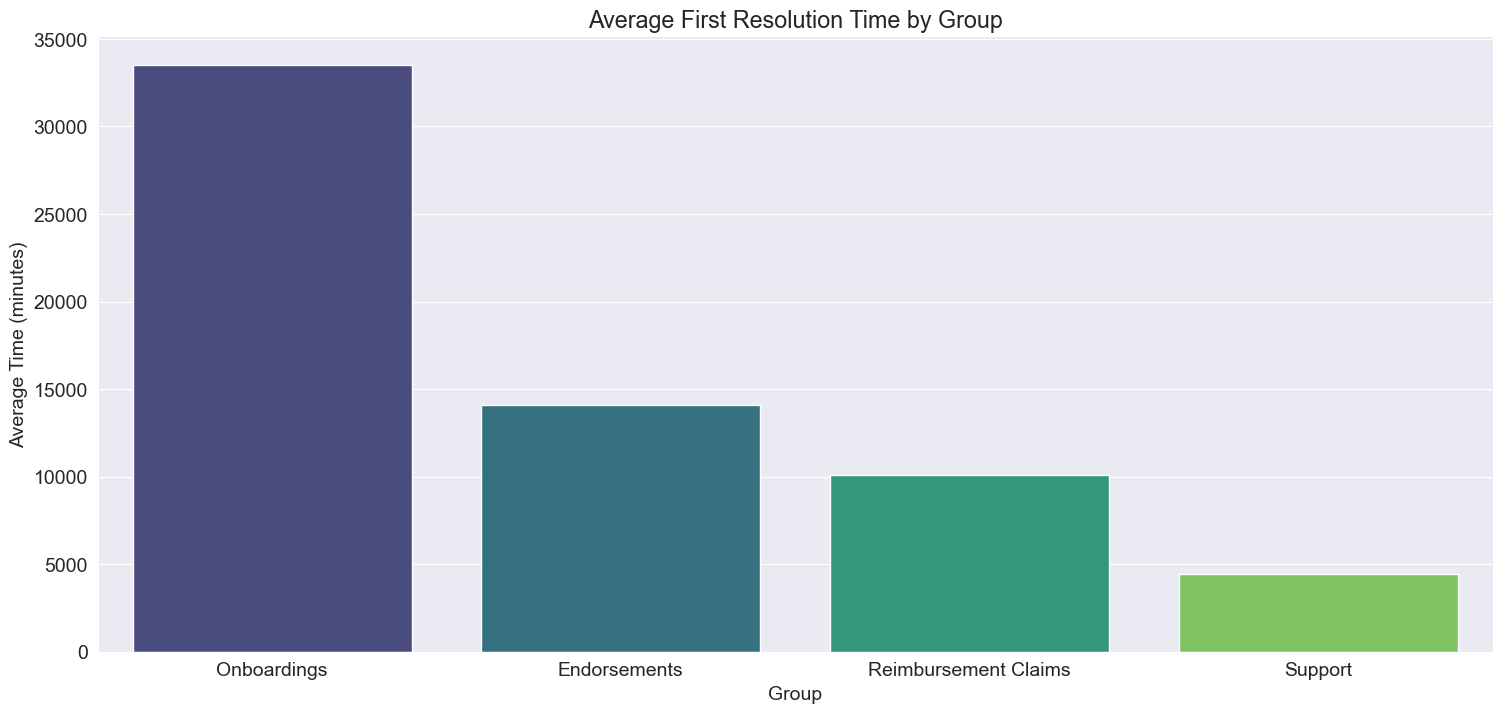

In [ ]:
# Plotting
group_efficiency = group_efficiency.sort_values(by='First resolution time in minutes', ascending=False)

sns.barplot(x=group_efficiency.index, y='First resolution time in minutes', data=group_efficiency, palette='viridis')
plt.title('Average First Resolution Time by Group')
plt.xlabel('Group')
plt.ylabel('Average Time (minutes)')
plt.show()

-- Rationale:

This code performs a group-wise analysis based on the 'Group' column, calculating the average first resolution time and number of replies for each group. The bar plot visualizes these averages, making it easier to identify which groups are quicker or slower in resolution time.

-- Observations:

1. Group-wise First Resolution Time:

* Endorsements: This group has an average first resolution time of approximately 14107 minutes, indicating a relatively longer time for issue resolution.
* Onboardings: The average first resolution time for this group is notably higher, around 33507 minutes, suggesting a significant delay in addressing onboardings.
* Reimbursement Claims: This group shows a moderate average first resolution time of about 10110 minutes.
* Support: The support group has a comparatively lower average first resolution time, approximately 4420 minutes.

2. Group-wise Replies:

* Endorsements: This group has an average of approximately 1.08 replies per case.
* Onboardings: The average number of replies for onboardings is relatively high, at about 5.89 replies per case.
* Reimbursement Claims: This group shows a moderate average of approximately 2.14 replies per case.
* Support: The support group has an average of approximately 2.47 replies per case.


-- Recommendations:

1. Endorsements Group:

* Investigate the reasons behind the longer first resolution time in the Endorsements group.
* Consider process optimizations or additional resources to reduce the resolution time for this group.

2. Onboardings Group:

* Address the significantly higher first resolution time for onboardings. Identify bottlenecks or challenges causing delays.
* Streamline the onboarding process to reduce the time required for issue resolution.

3. Reimbursement Claims Group:

* Although the first resolution time is moderate, monitor and optimize processes to maintain efficiency.
* Ensure that the number of replies aligns with the complexity of reimbursement claims.

4. Support Group:

* Acknowledge the relatively lower first resolution time in the Support group.
* Identify and share best practices from the Support group with other teams to enhance overall efficiency.

5. Overall Group Collaboration:

* Encourage cross-team collaboration and knowledge-sharing to improve efficiency across all groups.
* Regularly review and update processes based on insights gained from group-wise efficiency metrics.
* By addressing specific challenges in each group and promoting collaboration, the overall efficiency of the support system can be enhanced, leading to improved customer satisfaction.

### 3. What type of tickets are taking the most time to resolve? 

In [ ]:
# 3. Ticket types analysis
ticket_types_efficiency = data.groupby('Status')[['First resolution time in minutes', 'Replies']].mean()
# Display the table
print("Ticket Type-wise Efficiency Analysis:")
ticket_types_efficiency

Ticket Type-wise Efficiency Analysis:


,First resolution time in minutes,Replies
Status,,
Closed,7748.485738,1.711002
Solved,23579.798036,3.287985


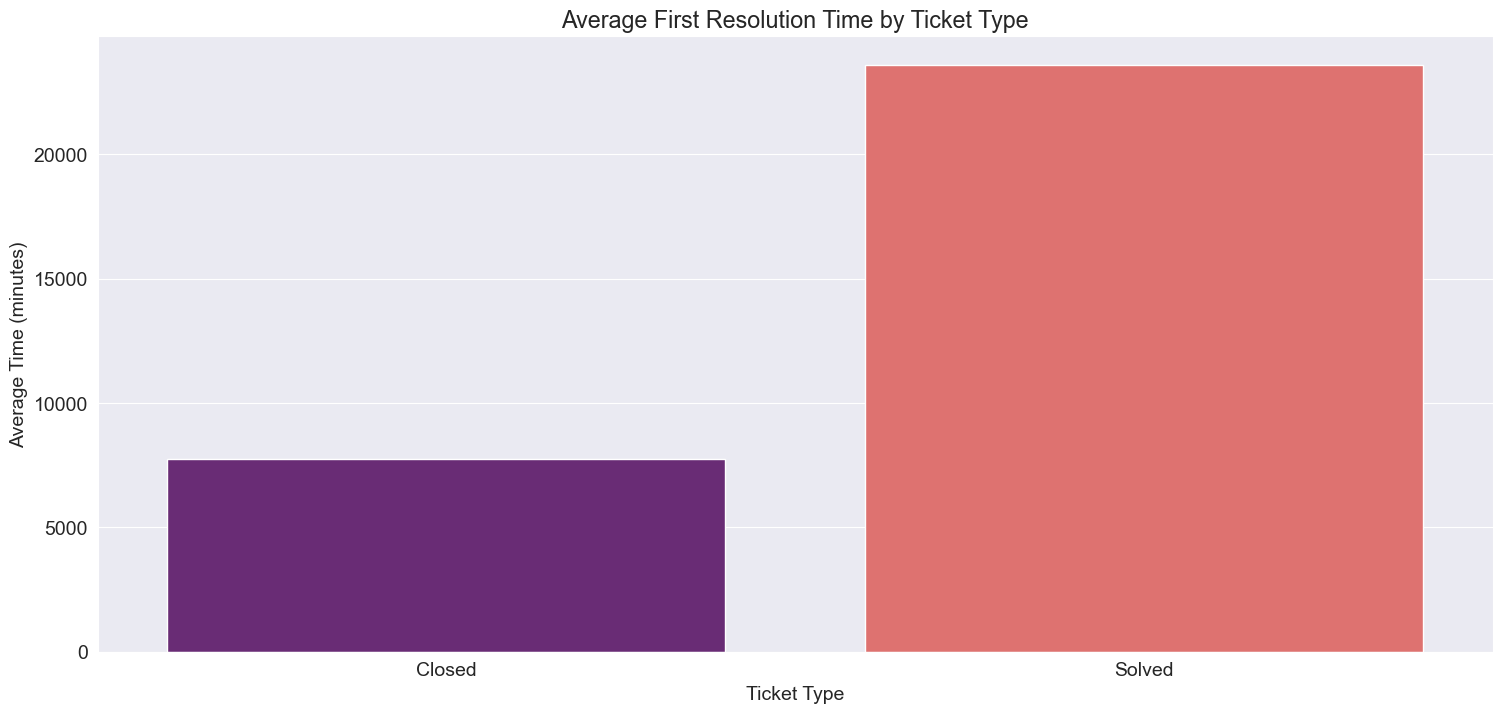

In [ ]:
# Plotting
sns.barplot(x=ticket_types_efficiency.index, y='First resolution time in minutes', data=ticket_types_efficiency, palette='magma')
plt.title('Average First Resolution Time by Ticket Type')
plt.xlabel('Ticket Type')
plt.ylabel('Average Time (minutes)')
plt.show()

-- Rationale:

This code groups the data by the 'Status' column, calculating the average first resolution time and number of replies for each ticket type. The bar plot provides a visual representation, and the table displays the calculated averages. Understanding ticket types' resolution times helps identify which types may require special attention or improvement.

-- Observations:

1. Ticket Type-wise First Resolution Time:

* Closed Tickets: The average first resolution time for closed tickets is approximately 7748 minutes, indicating a relatively shorter time for resolution.
* Solved Tickets: Solved tickets have a significantly higher average first resolution time of about 23580 minutes.

2. Ticket Type-wise Replies:

* Closed Tickets: On average, closed tickets receive around 1.71 replies, suggesting a moderate level of communication before resolution.
* Solved Tickets: Solved tickets show a higher average of approximately 3.29 replies per case, indicating more interaction during the resolution process.

-- Recommendations:

1. Closed Tickets:

* Acknowledge the efficient first resolution time for closed tickets.
* Continue maintaining this efficiency and explore opportunities for further optimization.
* Monitor the number of replies to ensure effective communication without unnecessary delays.

2. Solved Tickets:

* Investigate the reasons behind the higher first resolution time for solved tickets.
* Identify potential bottlenecks or challenges in the resolution process and work towards streamlining it.
* Assess whether the increased number of replies is contributing to longer resolution times and explore ways to optimize communication.

In [ ]:
# 'Group' represents different categories or types of requests
group_and_resolution_time = data[['Group', 'Full resolution time in minutes']]

# Calculate the average resolution time for each group
average_resolution_time_by_group = group_and_resolution_time.groupby('Group')['Full resolution time in minutes'].mean()

# Sort the groups based on average resolution time in descending order
sorted_groups_by_resolution_time = average_resolution_time_by_group.sort_values(ascending=False)

# Display the result
sorted_groups_by_resolution_time


Group
Onboardings             35478.437326
Reimbursement Claims    14943.767293
Endorsements            14777.719701
Support                  6814.429672
Name: Full resolution time in minutes, dtype: float64

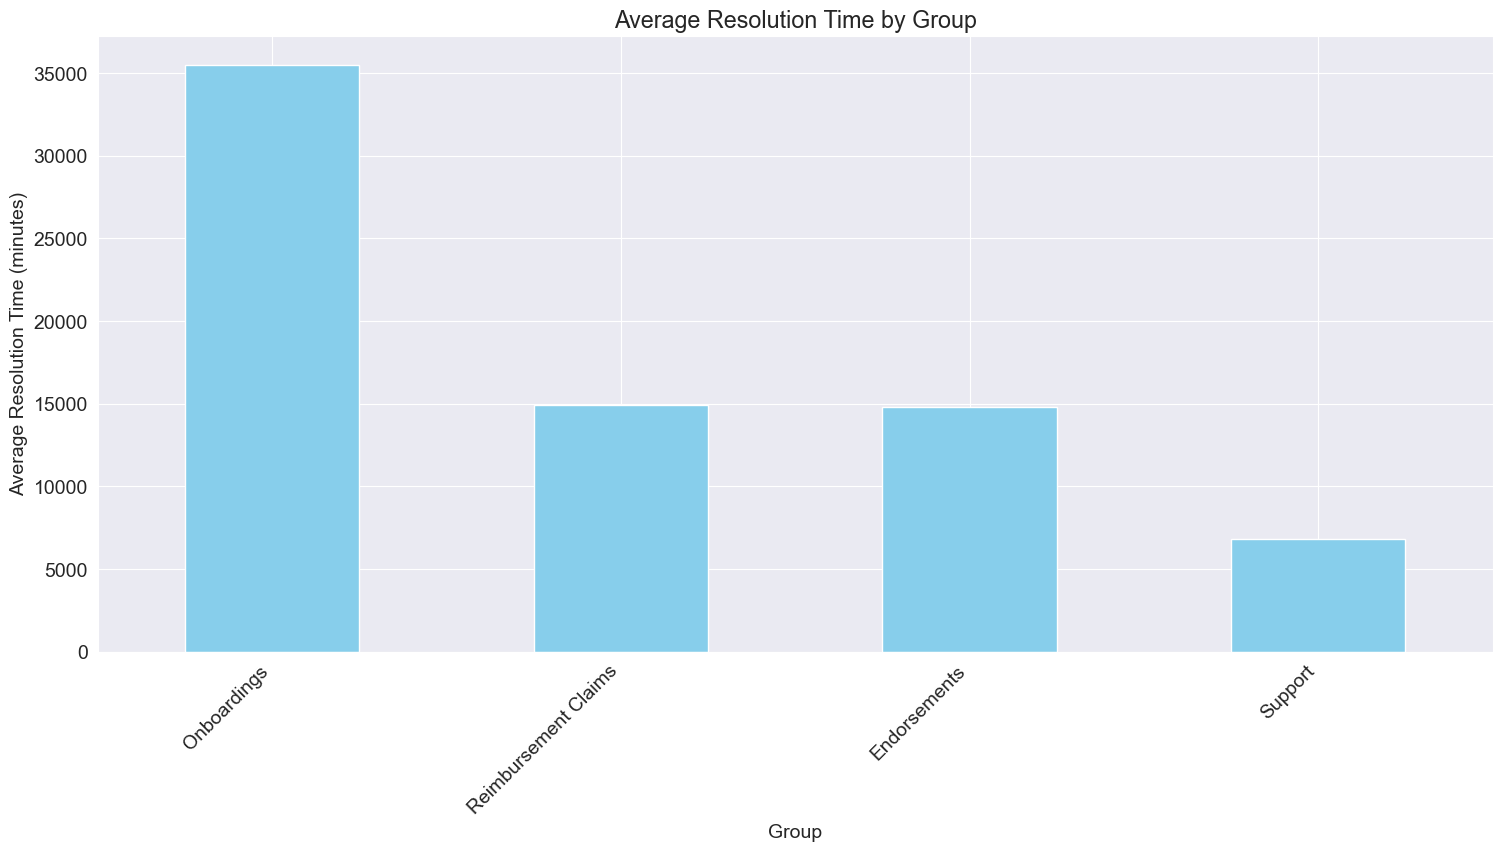

In [ ]:
# Plotting
sorted_groups_by_resolution_time.plot(kind='bar', color='skyblue')
plt.title('Average Resolution Time by Group')
plt.xlabel('Group')
plt.ylabel('Average Resolution Time (minutes)')
plt.xticks(rotation=45, ha='right')
plt.show()

-- Observations and Recommendations for Ticket Type-wise Efficiency Analysis:

1. Onboardings:

* Onboardings have the highest average resolution time among the groups, with an average of 35,478 minutes.
* This extended resolution time could be due to the complexity or nature of Onboarding requests.

Recommendation: Consider reviewing the Onboarding process to identify bottlenecks and streamline the resolution workflow.

2. Reimbursement Claims:

* Reimbursement Claims have a moderate average resolution time of 14,943 minutes.
* It's important to understand the reasons behind this duration and evaluate if there are opportunities for improvement.

Recommendation: Analyze the Reimbursement Claims process to identify areas for optimization and potential efficiency gains.

3. Endorsements:

* Endorsements have a slightly lower average resolution time compared to Reimbursement Claims, at 14,777 minutes.
* Similar to Reimbursement Claims, explore specific aspects of the Endorsements process to enhance efficiency.

Recommendation: Conduct a detailed review of the Endorsements workflow to identify and address any inefficiencies.

4. Support:

* Support requests have the lowest average resolution time among the groups, with an average of 6,814 minutes.
* This suggests that the Support group is relatively quicker in resolving issues compared to other groups.

Recommendation: Investigate the practices and strategies employed by the Support group that contribute to their efficiency and consider implementing best practices across other groups.

5. Overall Recommendations:

* Identify specific factors contributing to longer resolution times in Onboardings, Reimbursement Claims, and Endorsements.
* Implement process improvements and streamline workflows to reduce resolution times.
* Encourage knowledge sharing and best practices across different groups, particularly adopting efficient strategies observed in the Support group.
* Adjustments to these recommendations may be needed based on a deeper understanding of the processes and additional context surrounding the data.